# Exploration of Loan Data from Prosper

## Introduction

#### Dataset Overview

This data set contains **113,937** loans with **81** variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This <a href="https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0">data dictionary</a> explains the variables in the data set.

#### Questions try to be addressed:
* What factors affect a loan’s outcome status?
* What affects the borrower’s APR?
* Are there differences between loans depending on how large the original loan amount was?

#### Journey to the Exploration of this Dataset:

* [Step 1](#s1): Data Wrangling
    * [Step 1.1](#s1.1): Gathering
    * [Step 1.2](#s1.2): Accessing
    * [Step 1.3](#s1.3): Cleaning

* [Step 2](#s2): Data Exploration
    * [Step 2.1](#s2.1): Univariate Exploration
    * [Step 2.2](#s2.2): Bibariate Exploration
    * [Step 2.3](#s2.3): Multivariate Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

<a id="s1"></a>
## Step 1: Data Wrangling

<a id="s1.1"></a>
### Step 1.1: Gathering

In [3]:
# Load the loan data into DataFrame
loan_url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
loan = pd.read_csv(loan_url)

<a id="s1.2"></a>
### Step 1.2: Accessing

In [4]:
# Dataset size
loan.shape

(113937, 81)

In [5]:
# Dataset overview
loan.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
28062,356A35720335104603B0146,720875,2013-03-01 08:43:59.003000000,NaN,36,Current,NaN,0.28780,0.2492,0.2392,0.2190,0.1125,0.1065,3.0,D,3.0,7,VA,Social Worker,Employed,31.0,False,False,NaN,2013-02-13 05:51:35,680.0,699.0,2000-08-07 00:00:00,8.0,8.0,32.0,14,817.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18151.0,0.88,2249.0,31.0,0.83,0.0,0.44,"$25,000-49,999",True,4000.000000,C35C367544505682947BED7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,12,86146,10000,2013-03-06 00:00:00,Q1 2013,6B0F3548298660938A68CF4,397.18,4368.98,2299.18,2069.80,-83.07,0.00,0.0,0.00,0.0,1.0,0,0,0.0,134
54483,660335245558525226DAC9C,525345,2011-09-01 17:57:17.670000000,NaN,36,Past Due (1-15 days),NaN,0.28339,0.2449,0.2349,0.2291,0.1050,0.1241,3.0,D,5.0,1,NJ,Professional,Employed,17.0,False,False,NaN,2011-12-30 07:06:26,600.0,619.0,1992-06-01 00:00:00,8.0,7.0,35.0,9,612.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,15151.0,0.94,747.0,27.0,1.00,0.0,0.34,"$25,000-49,999",True,3333.333333,64043642616462374B74F78,2.0,39.0,35.0,4.0,0.0,7760.0,0.48,9.0,10,NaN,26,59813,5665,2012-01-31 00:00:00,Q1 2012,B7B233692602119491C4C94,223.71,5324.04,2962.86,2361.18,-89.06,-316.31,0.0,0.00,0.0,1.0,1,0,0.0,2
25779,06A3340033492517497ACD7,202915,2007-09-17 15:25:29.917000000,C,36,Completed,2009-05-13 00:00:00,0.17904,0.1700,0.1600,NaN,NaN,NaN,NaN,NaN,NaN,0,IL,Other,Full-time,27.0,False,False,NaN,2007-09-17 14:31:04.470000000,640.0,659.0,1999-08-07 00:00:00,10.0,6.0,22.0,5,183.0,1.0,3.0,0.0,0.0,31.0,1.0,0.0,3616.0,0.83,553.0,18.0,0.66,0.0,0.34,"$1-24,999",True,1833.333333,9ECC3399986233883D8C8EE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19682,2000,2007-09-27 00:00:00,Q3 2007,B97D3399601497471E54404,71.31,2309.50,2000.00,309.50,-18.21,0.00,0.0,0.00,0.0,1.0,0,0,0.0,24
103979,937E3571072603266D9016B,717306,2013-02-21 14:03:21.773000000,NaN,36,Current,NaN,0.28032,0.2419,0.2319,0.2126,0.1075,0.1051,3.0,D,4.0,3,TX,Other,Employed,87.0,False,False,NaN,2013-02-21 14:03:17,740.0,759.0,1998-09-03 00:00:00,13.0,12.0,38.0,10,374.0,1.0,9.0,1.0,313.0,0.0,0.0,0.0,3362.0,0.17,16218.0,33.0,0.97,1.0,0.21,"$100,000+",True,8833.333333,B0C73676740633675581623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,12,86017,15000,2013-03-04 00:00:00,Q1 2013,2F6035716642810378CA3A1,589.99,7079.88,3855.76,3224.12,-133.30,0.00,0.0,0.00,0.0,1.0,0,0,0.0,290
110693,2A9C33895694070701B0982,137347,2007-05-14 15:32:26.323000000,HR,36,Chargedoff,2008-07-28 00:00:00,0.26425,0.2490,0.2290,N

In [6]:
# Datatypes, missing values
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
# Summary statistics
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [8]:
# Duplicated records
loan.duplicated().sum()

0

In [9]:
# Missing values
n_missing = loan.isnull().sum()

# Extract columns with missing values greater than 0
n_missing = n_missing[n_missing > 0]

# Calculate the percentage of missing values
n_missing_pct = np.round(n_missing / loan.shape[0] * 100, 2)

# Display the missing values info
pd.DataFrame({'Feature': n_missing.index,
              'Missing Values': n_missing.values,
              'Percentage': n_missing_pct.values}).sort_values('Missing Values', ascending=False)

,Feature,Missing Values,Percentage
13,GroupKey,100596,88.29
42,LoanFirstDefaultedCycleNumber,96985,85.12
41,ScorexChangeAtTimeOfListing,95009,83.39
40,ProsperPrincipalOutstanding,91852,80.62
39,ProsperPrincipalBorrowed,91852,80.62
38,ProsperPaymentsOneMonthPlusLate,91852,80.62
37,ProsperPaymentsLessThanOneMonthLate,91852,80.62
36,OnTimeProsperPayments,91852,80.62
35,TotalProsperPaymentsBilled,91852,80.62
34,TotalProsperLoans,91852,80.62


There are 81 variables in this dataset, but variables of interest below are selected to address the questions.

In [10]:
# Select features of interest for futher exploration
subset_cols = ['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperRating (Alpha)', 
               'ListingCategory (numeric)','EmploymentStatus', 'DelinquenciesLast7Years', 
               'TotalProsperLoans', 'LoanOriginalAmount', 'LoanOriginationDate', 'Recommendations']

loan_subset = loan[subset_cols].copy()

In [11]:
loan_subset.shape

(113937, 11)

In [12]:
loan_subset.sample(5)

,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations
111561,36,Defaulted,0.24800,NaN,0,Not available,0.0,NaN,1050,2006-11-07 00:00:00,0
13901,36,Completed,0.22712,C,1,Employed,0.0,NaN,9500,2013-03-06 00:00:00,0
2208,60,Completed,0.23718,B,2,Employed,6.0,NaN,7500,2012-08-17 00:00:00,0
63833,36,Current,0.15223,A,1,Employed,0.0,NaN,25000,2014-02-10 00:00:00,0
109055,36,Current,0.19501,B,7,Employed,0.0,NaN,2700,2013-10-16 00:00:00,0


In [13]:
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   DelinquenciesLast7Years    112947 non-null  float64
 7   TotalProsperLoans          22085 non-null   float64
 8   LoanOriginalAmount         113937 non-null  int64  
 9   LoanOriginationDate        113937 non-null  object 
 10  Recommendations            113937 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 9.6+ MB


In [14]:
loan_subset.isnull().sum().sort_values(ascending=False)

TotalProsperLoans            91852
ProsperRating (Alpha)        29084
EmploymentStatus              2255
DelinquenciesLast7Years        990
BorrowerAPR                     25
Recommendations                  0
LoanOriginationDate              0
LoanOriginalAmount               0
ListingCategory (numeric)        0
LoanStatus                       0
Term                             0
dtype: int64

<a id="s1.3"></a>
### Step 1.3: Cleaning

#### Define

Some column names/values are not informative. Some of the datatypes are correct but not in their best form. finally, there are lots of missing values in come columns. Below are the to-dos to address these issues:

- Rename columns
- Convert column datatypes
- Drop missing values

#### Code

In [15]:
# Rename columns
loan_subset.rename(columns={'ProsperRating (Alpha)': 'ProsperRatingAlpha',
                            'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

In [16]:
# Re-encode the Listing Category
listing_cat = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 
               3: 'Business', 4: 'Personal Loan', 5: 'Student Use', 6: 'Auto', 
               7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure',
               11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses',
               14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle',
               17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

loan_subset['ListingCategory'] = loan_subset['ListingCategory'].map(listing_cat)

In [17]:
# Convert columns to DateTime
loan_subset['LoanOriginationDate'] = pd.to_datetime(loan_subset['LoanOriginationDate'])

# Convert columns to category
cat_cols = ['LoanStatus', 'ProsperRatingAlpha', 'ListingCategory', 'EmploymentStatus']
for col in cat_cols:
    loan_subset[col] = loan_subset[col].astype('category')

In [18]:
# Drop missing values
loan_subset.dropna(subset=['ProsperRatingAlpha'], inplace=True)
loan_subset.reset_index(inplace=True, drop=True)

In [19]:
# Impute missing values in TotalProsperLoans column
loan_subset['TotalProsperLoans'] = loan_subset['TotalProsperLoans'].fillna(0)

In [20]:
# convert to int datatype
loan_subset['TotalProsperLoans'] = loan_subset['TotalProsperLoans'].astype(np.int64)
loan_subset['DelinquenciesLast7Years'] = loan_subset['DelinquenciesLast7Years'].astype(np.int64)

#### Test

In [21]:
loan_subset.head()

,Term,LoanStatus,BorrowerAPR,ProsperRatingAlpha,ListingCategory,EmploymentStatus,DelinquenciesLast7Years,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations
0,36,Current,0.12016,A,Home Improvement,Employed,0,0,10000,2014-03-03,0
1,36,Current,0.12528,A,Motorcycle,Employed,14,0,10000,2012-11-01,0
2,36,Current,0.24614,D,Home Improvement,Employed,0,1,15000,2013-09-20,0
3,60,Current,0.15425,B,Debt Consolidation,Employed,0,0,15000,2013-12-24,0
4,36,Current,0.31032,E,Debt Consolidation,Employed,0,0,3000,2013-04-18,0


In [22]:
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Term                     84853 non-null  int64         
 1   LoanStatus               84853 non-null  category      
 2   BorrowerAPR              84853 non-null  float64       
 3   ProsperRatingAlpha       84853 non-null  category      
 4   ListingCategory          84853 non-null  category      
 5   EmploymentStatus         84853 non-null  category      
 6   DelinquenciesLast7Years  84853 non-null  int64         
 7   TotalProsperLoans        84853 non-null  int64         
 8   LoanOriginalAmount       84853 non-null  int64         
 9   LoanOriginationDate      84853 non-null  datetime64[ns]
 10  Recommendations          84853 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(1), int64(5)
memory usage: 4.9 MB


In [23]:
loan_subset.describe()

,Term,BorrowerAPR,DelinquenciesLast7Years,TotalProsperLoans,LoanOriginalAmount,Recommendations
count,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000
mean,42.486135,0.226658,3.659435,0.340789,9083.440515,0.017560
std,11.640346,0.079916,9.347957,0.726235,6287.860058,0.187963
min,12.000000,0.045830,0.000000,0.000000,1000.000000,0.000000
25%,36.000000,0.163280,0.000000,0.000000,4000.000000,0.000000
50%,36.000000,0.219450,0.000000,0.000000,7500.000000,0.000000
75%,60.000000,0.292540,2.000000,0.000000,13500.000000,0.000000
max,60.000000,0.423950,99.000000,8.000000,35000.000000,19.000000


<a id="s2"></a>
## Step 2: Data Exploring

<a id="s2.1"></a>
### Step 2.1: Univariate Exploring

In this univariate exploration, the primary interests is to find out the distribution of each variable so as to pick which variable(s) is helpful in further bivariate analysis.

In [24]:
# Set plotting color
base_color = sns.color_palette()[0]

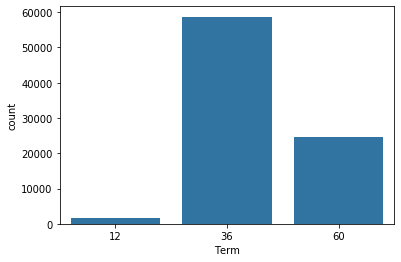

In [25]:
# Term disttibution
sns.countplot(data=loan_subset, x='Term', color=base_color);

The most common loan term is **36** months, while the least common one is **12**.

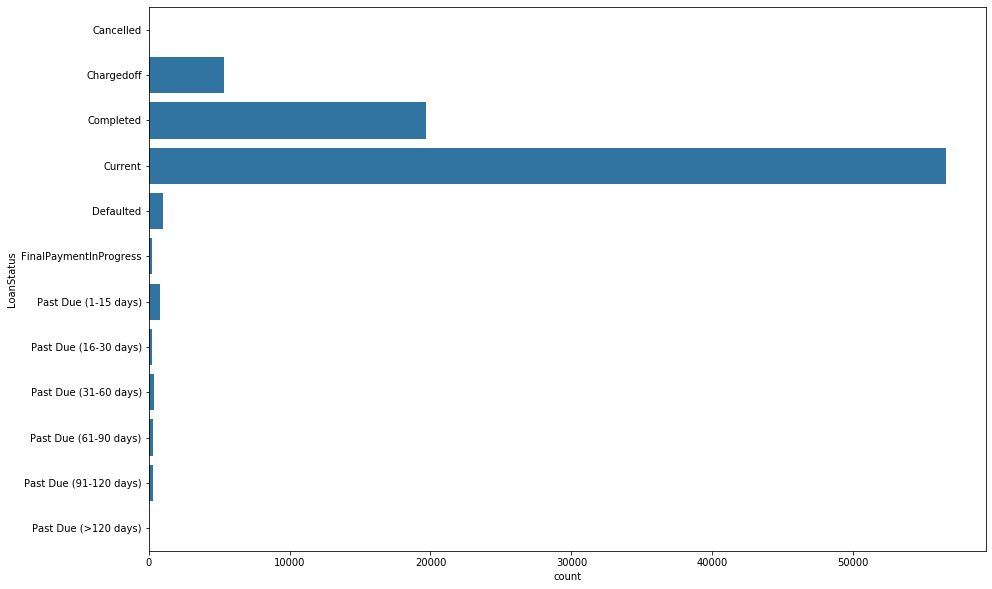

In [26]:
# LoanStatus distribution
plt.figure(figsize=(15, 10))
sns.countplot(data=loan_subset, y='LoanStatus', color=base_color);

The majority are **Current** loans. **Completed** and **Chargedoff** loans come next.

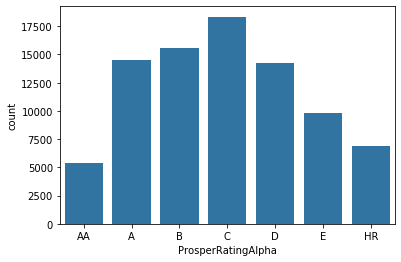

In [27]:
# ProsperRatingAlpha distribution
ratings = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sns.countplot(data=loan_subset, x='ProsperRatingAlpha', color=base_color, order=ratings);

ProsperRatingAlpha looks **normal** to me. **C** rating are most commmon, while **AA** and **HR** are least common ones.

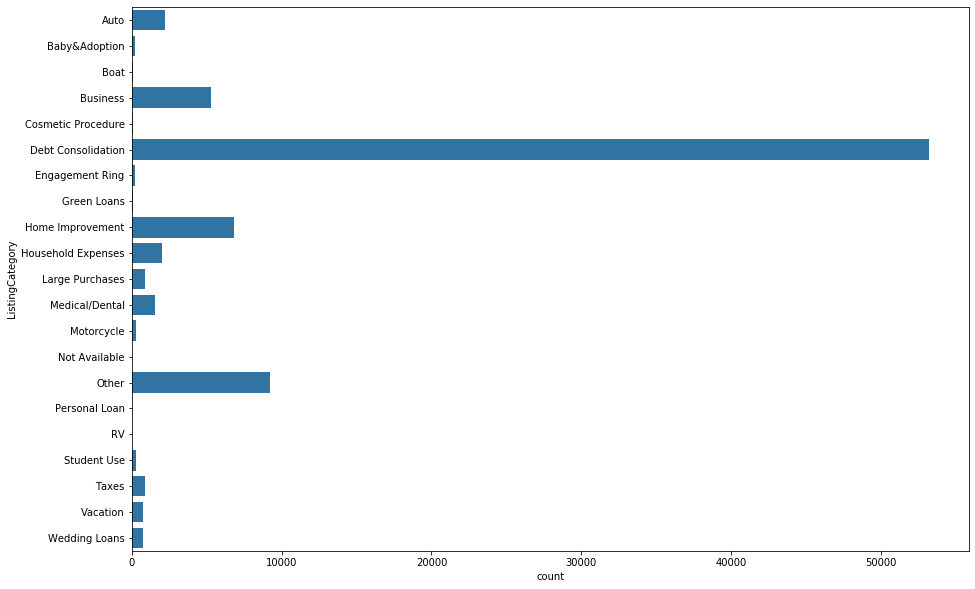

In [28]:
# ListingCategory distribution
plt.figure(figsize=(15, 10))
sns.countplot(data=loan_subset, y='ListingCategory', color=base_color);

**Debt consolidation (1), Other (7), Home Improvement (2) and Business (3)** are the most common listings among borrowers.

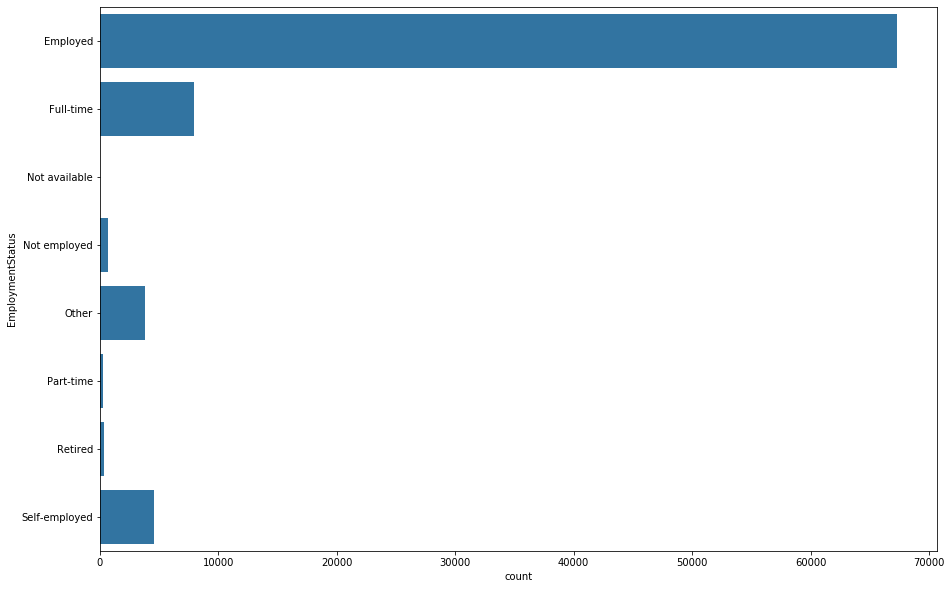

In [29]:
# EmploymentStatus distribution
plt.figure(figsize=(15,10))
sns.countplot(data=loan_subset, y='EmploymentStatus', color=base_color);

The bulk of borrowers are **Employed**.

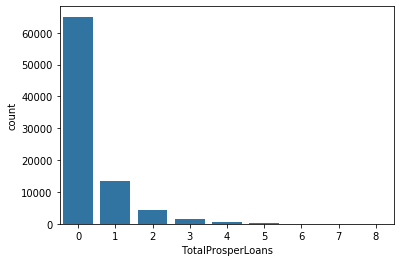

In [30]:
# TotalProsperLoans distribution
sns.countplot(data=loan_subset, x='TotalProsperLoans', color=base_color);

The majority are **first time borrowers**, while the minority have **existing loans of 1 to 2**. The maximum number of loans is **8**.

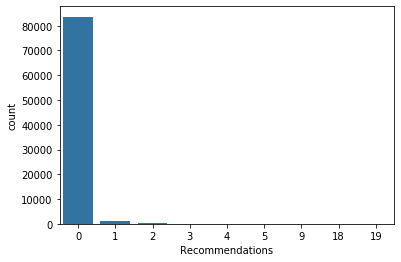

In [31]:
# Recommendations distribution
sns.countplot(data=loan_subset, x='Recommendations', color=base_color);

The majority of borrowers **rarely have any recommendation** while applying for loans.

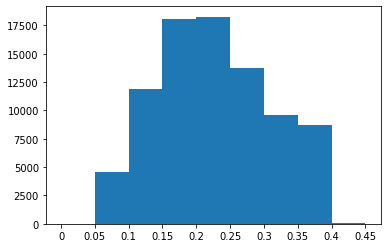

In [32]:
# BorrowerAPR distribution
bins = np.arange(0, loan_subset['BorrowerAPR'].max()+ 0.05, 0.05)
ticks = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
labels = ['{}'.format(val) for val in ticks]


plt.hist(data=loan_subset, x='BorrowerAPR', bins=bins, color=base_color)
plt.xticks(ticks, labels);

The majority of BorrowerAPR are in the range between about **0.15 and 0.25**. Overall, a generally **bimodal** distribution is obseraved.

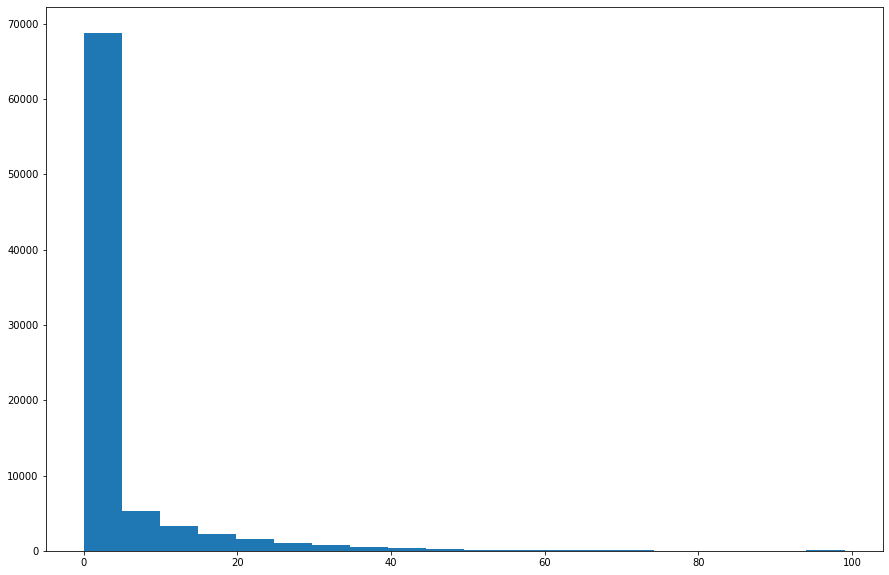

In [33]:
# DelinquenciesLast7Years distribution
plt.figure(figsize=(15, 10))
plt.hist(data=loan_subset, x='DelinquenciesLast7Years', bins=20, color=base_color);

The majority of borrowers have **0** deliquencies in the last 7 years. the minority have deliquencies between about **1 to 30**. The maximum number of deliquencies is **99**.

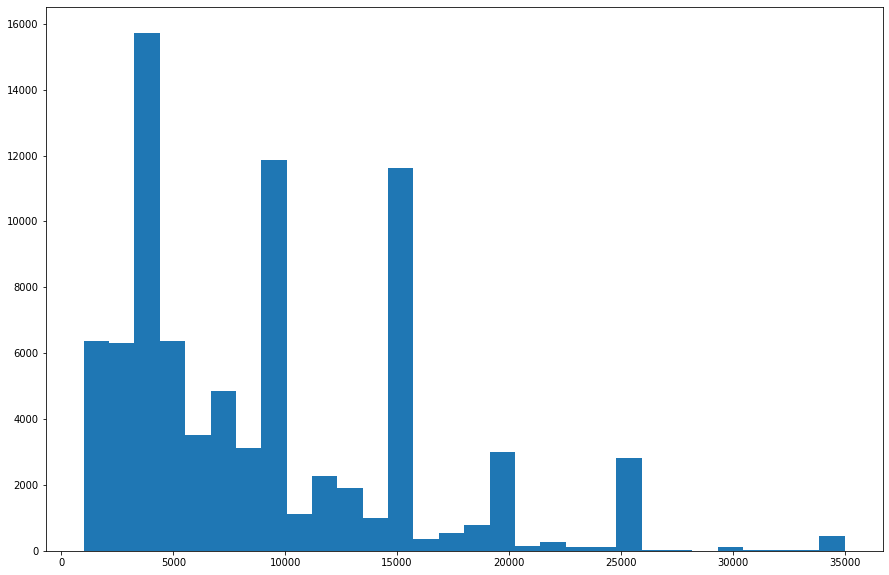

In [34]:
# LoanOriginalAmount distribution
plt.figure(figsize=(15,10))
plt.hist(data=loan_subset, x='LoanOriginalAmount', bins=30, color=base_color);

The majority of loan amount are about **4,000, 1000 or 15000**. 

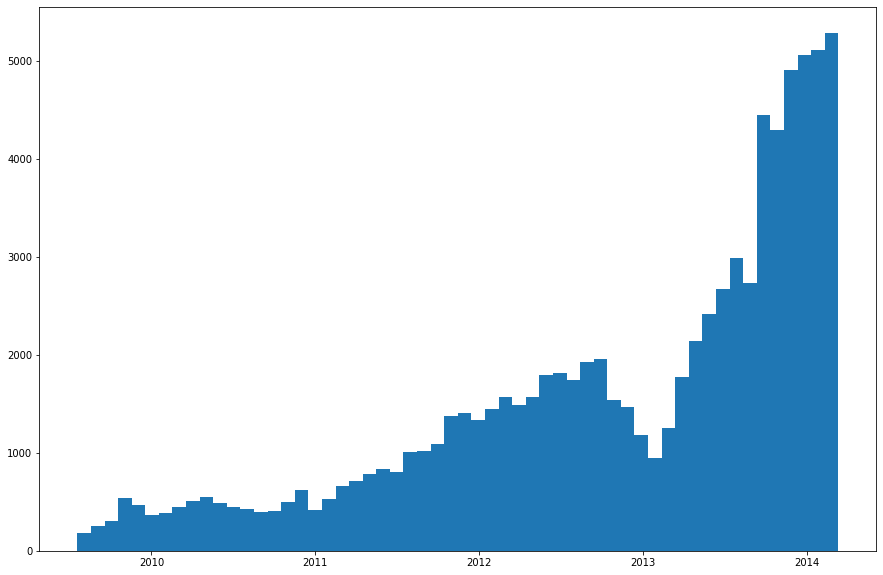

In [35]:
# LoanOriginationDate distribution
plt.figure(figsize=(15,10))
plt.hist(data=loan_subset, x='LoanOriginationDate', bins=56, color=base_color);

In general, the number of loans **grows over time**. Starting from around 2013, there is a substancial growth in terms of the number of loans.

#### Define

Through univariate exploration, loans with loan status of **Completed, Chargedoff or Defaulted** are of interests. Chargedoff can be considered as Defaulted in this context.

#### Code

In [36]:
# Loan status distribution
loan_subset.LoanStatus.value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     0
Name: LoanStatus, dtype: int64

In [37]:
# Extract loan status of interest
loan_status_filter = (loan_subset.LoanStatus == 'Completed') | (loan_subset.LoanStatus == 'Defaulted') | (loan_subset.LoanStatus == 'Chargedoff')
loan_subset = loan_subset[loan_status_filter]

# Re-encode the Chargedoff as Defaulted
loan_subset['LoanStatus'] = loan_subset['LoanStatus'].apply(lambda x: 'Defaulted' if x == 'Chargedoff' else x)
# Change to category datatype
loan_subset.LoanStatus = loan_subset.LoanStatus.astype('category')

#### Test

In [38]:
loan_subset.LoanStatus.value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

#### Define

The bulk of loans belong to a few categories in the ListingCategory variabl. Thus, the minority can be considered as others.

- Re-encode the listing categories, categorize categories that are not in the bulk ('Debt Consolidation', 'Other', 'Home Improvement', 'Business', 'Auto') as **Other**.

#### Code

In [39]:
loan_subset.ListingCategory.value_counts()

Debt Consolidation    12740
Other                  4766
Home Improvement       2612
Business               2366
Auto                   1204
Household Expenses      597
Medical/Dental          370
Student Use             274
Taxes                   214
Vacation                198
Large Purchases         181
Wedding Loans           171
Motorcycle               94
Engagement Ring          63
Cosmetic Procedure       44
Baby&Adoption            40
Boat                     28
Green Loans              19
RV                       17
Not Available             7
Personal Loan             0
Name: ListingCategory, dtype: int64

In [40]:
# The bulk categories of ListingCategory
listing_cat_bulk = list(loan_subset.ListingCategory.value_counts().index)[:5]
listing_cat_bulk

['Debt Consolidation', 'Other', 'Home Improvement', 'Business', 'Auto']

In [41]:
# Re-encode
loan_subset.ListingCategory = loan_subset.ListingCategory.apply(lambda x: 'Other' if x not in listing_cat_bulk else x)
loan_subset.ListingCategory = loan_subset.ListingCategory.astype('category')

#### Test

In [42]:
loan_subset.ListingCategory.value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory, dtype: int64

<a id="s2.2"></a>
### Step 2.2: Bivariate Exploring

Firstly, let's take a quick look at the correlations between numerical variables.

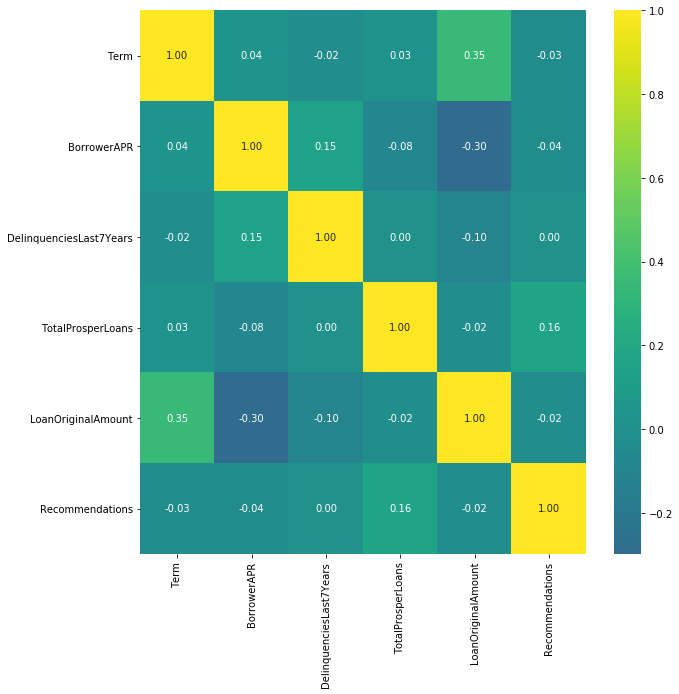

In [43]:
# Correlations between pairs of numerical features
plt.figure(figsize=(10,10))
sns.heatmap(loan_subset.corr(), annot=True, fmt='.2f', cmap='viridis', center=0);

- **BorrowerAPR** and **LoanOriginalAmount**, **LoanOriginalAmount** and **Term** are modetely correlated.
- **TotalProsperLoans** and **Recommedations**, **DelinquenciesLast7Years** and **BorrowerAPR**, **DelinquenciesLast7Years** and **LoanOriginalAmount** are weakly correlated. 

Then, it's time to find out what factor(s) affect the loan status outcome.

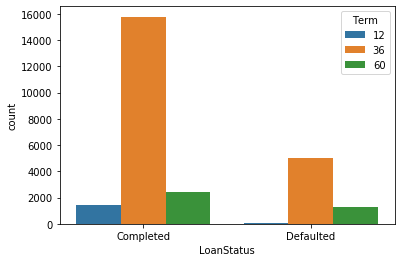

In [44]:
# LoanStatus vs. Term
sns.countplot(data=loan_subset, x='LoanStatus', hue='Term');

There is no obvious relationship between these two variables.

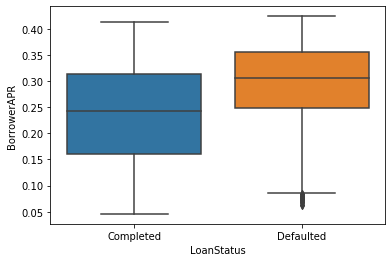

In [45]:
# LoanStatus vs. BorrowerAPR
sns.boxplot(data=loan_subset, x='LoanStatus', y='BorrowerAPR');

Defaulted loans tend to have **higher BorrowerAPR**.

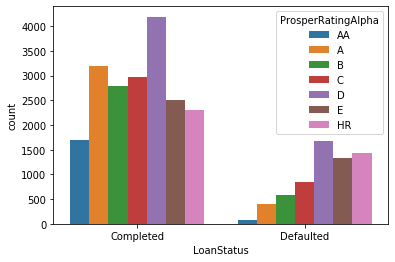

In [46]:
# LoanStatus vs. ProsperRatingAlpha 
sns.countplot(data=loan_subset, x='LoanStatus', hue='ProsperRatingAlpha', hue_order=ratings);

The most common Prosper rating is **D** in both defaulted and complted loans. Among defaulted loans, there are **more HR ratings than E ones** and **more B ratings than A ones**, while it is the **opposite** in completed loans.

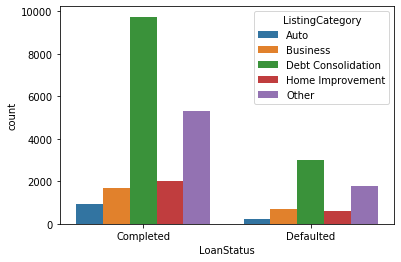

In [47]:
# LoanStatus vs. ListingCategory 
sns.countplot(data=loan_subset, x='LoanStatus', hue='ListingCategory');

The most common listing category is **Debt Consolidation** in both defaulted or completed loans.

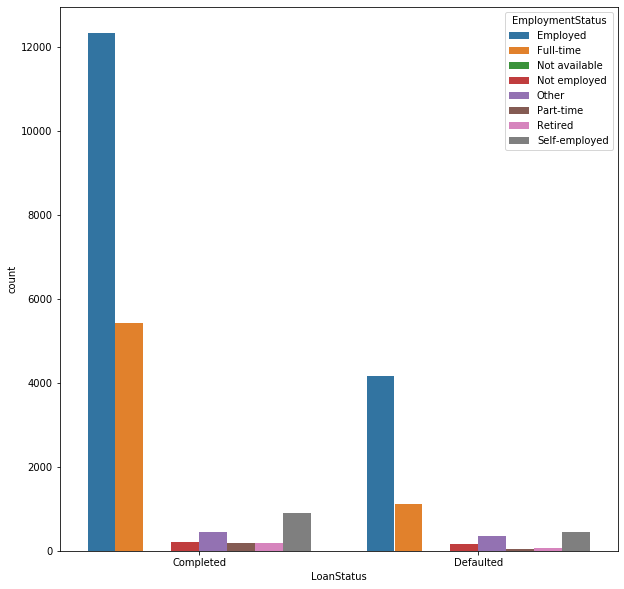

In [48]:
# LoanStatus vs. EmploymentStatus 
plt.figure(figsize=(10, 10))
sns.countplot(data=loan_subset, x='LoanStatus', hue='EmploymentStatus');

Defaulted loans have lower number of employment status associated with Employed or Full-time.

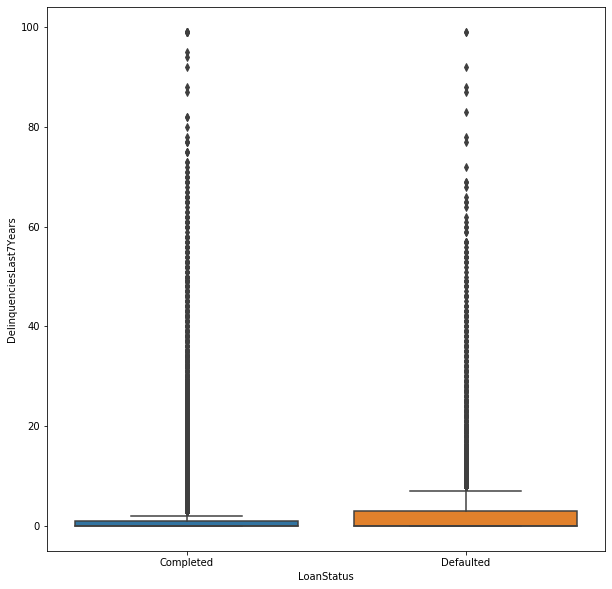

In [49]:
# LoanStatus vs. DelinquenciesLast7Years 
plt.figure(figsize=(10,10))
sns.boxplot(data=loan_subset, x='LoanStatus', y='DelinquenciesLast7Years');

Defaulted loans have wider IQR in terms of number of deliquencies in the last 7 years than complted ones

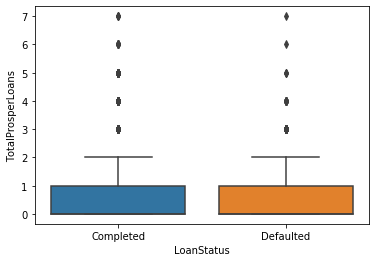

In [50]:
# LoanStatus vs. TotalProsperLoans 
sns.boxplot(data=loan_subset, x='LoanStatus', y='TotalProsperLoans');

There is no obvious relationship between these two variables.

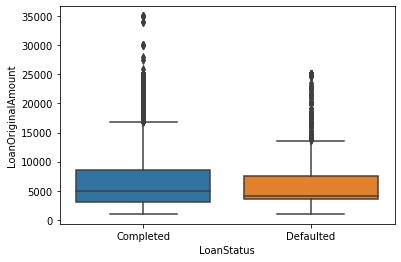

In [51]:
# LoanStatus vs. LoanOriginalAmount 
sns.boxplot(data=loan_subset, x='LoanStatus', y='LoanOriginalAmount');

Defaulted loans tend to have **lower** original loan amount.

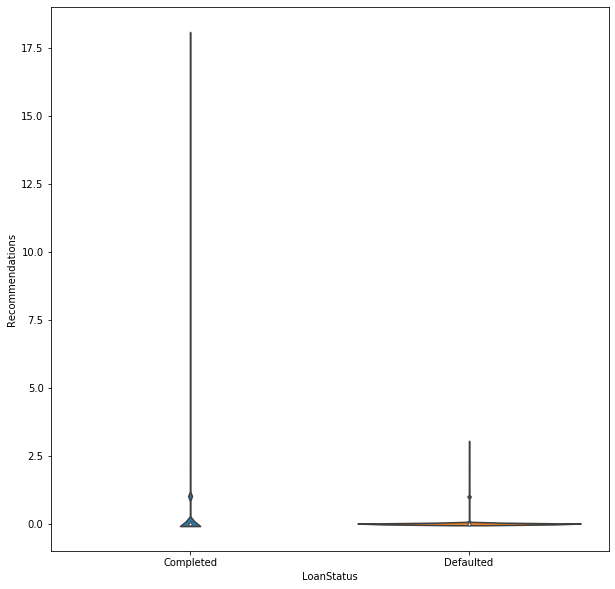

In [52]:
# LoanStatus vs. Recommendations 
plt.figure(figsize=(10,10))
sns.violinplot(data=loan_subset, x='LoanStatus', y='Recommendations');

There is no obvious relationship between these two variables.

Furthermore, it's time to find out what factor(s) affect the borrower APR.

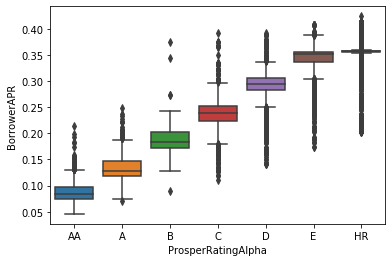

In [53]:
# BorrowerAPR vs. ProsperRatingAlpha
sns.boxplot(data=loan_subset, x='ProsperRatingAlpha', y='BorrowerAPR', order=ratings);

The **better** the ratings, the **lower** the APR. 

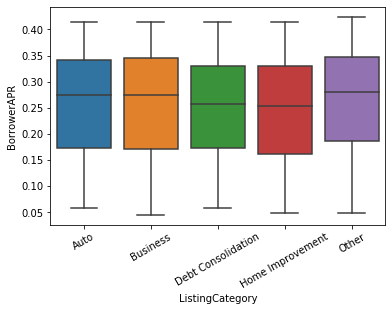

In [54]:
# BorrowerAPR vs. ListingCategory
sns.boxplot(data=loan_subset, x='ListingCategory', y='BorrowerAPR')
plt.xticks(rotation=30);

Listing categories **Debt Consolidation and Home Improvement** tend to have **lower** APR.

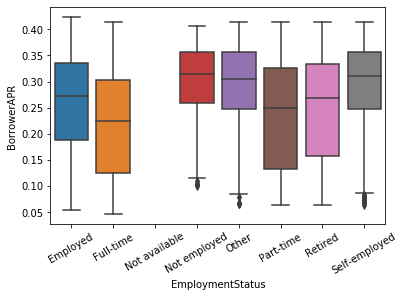

In [55]:
# BorrowerAPR vs. EmploymentStatus
sns.boxplot(data=loan_subset, x='EmploymentStatus', y='BorrowerAPR')
plt.xticks(rotation=30);

**Full-time** employment status tends to have **lower** APR.

Finally, let's find out what factor(s) affect Prosper's ratings.

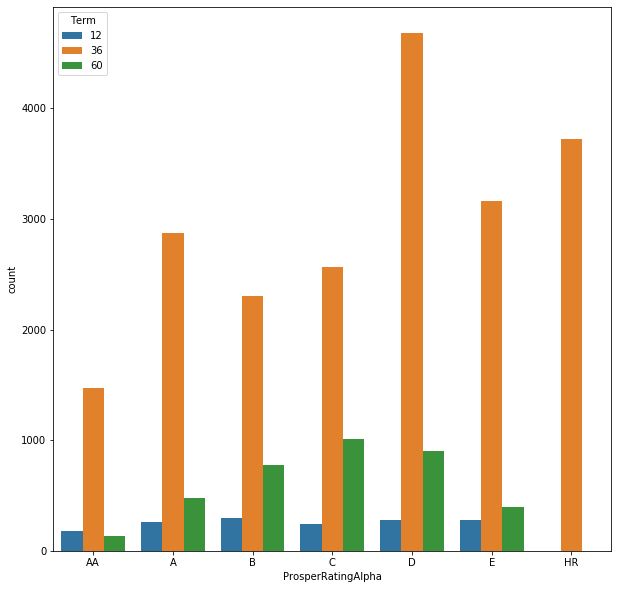

In [56]:
# ProsperRatingAlpha vs. Term
plt.figure(figsize=(10,10))
sns.countplot(data=loan_subset, x='ProsperRatingAlpha', hue='Term', order=ratings);

The most common term is **36 months** among all ratings. There is **no obvious relationship** between these two variabels.

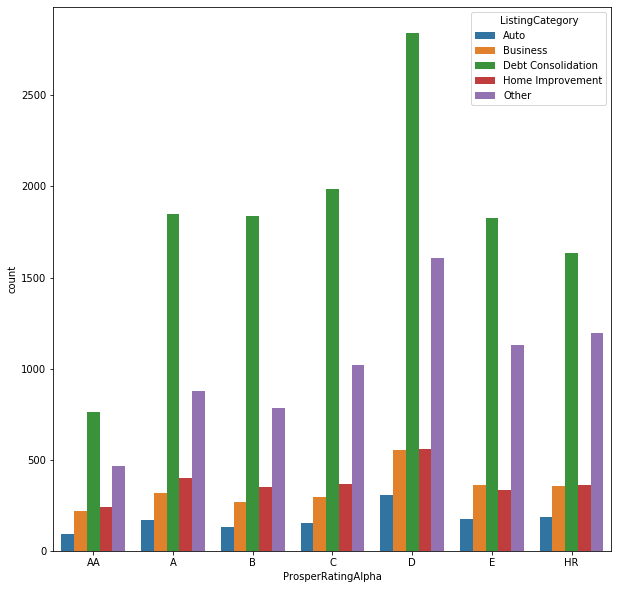

In [57]:
# ProsperRatingAlpha vs. ListingCategory
plt.figure(figsize=(10,10))
sns.countplot(data=loan_subset, x='ProsperRatingAlpha', hue='ListingCategory', order=ratings);

The most common listing category is **Debt Consolidation and Other**. There is **no obvious relationship** between these two variabels.

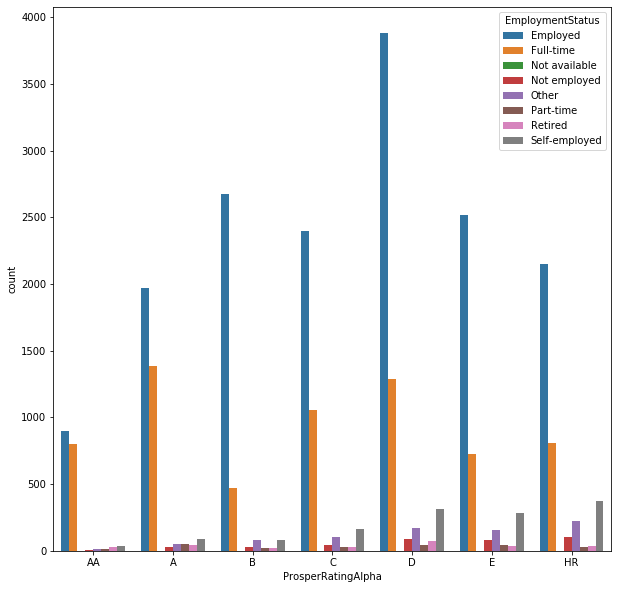

In [58]:
# ProsperRatingAlpha vs. EmploymentStatus
plt.figure(figsize=(10,10))
sns.countplot(data=loan_subset, x='ProsperRatingAlpha', hue='EmploymentStatus', order=ratings);

Lower ratings tend to have more employment status associated with **Not employed, Other, Part-time, Retired and Self-empoyed**.

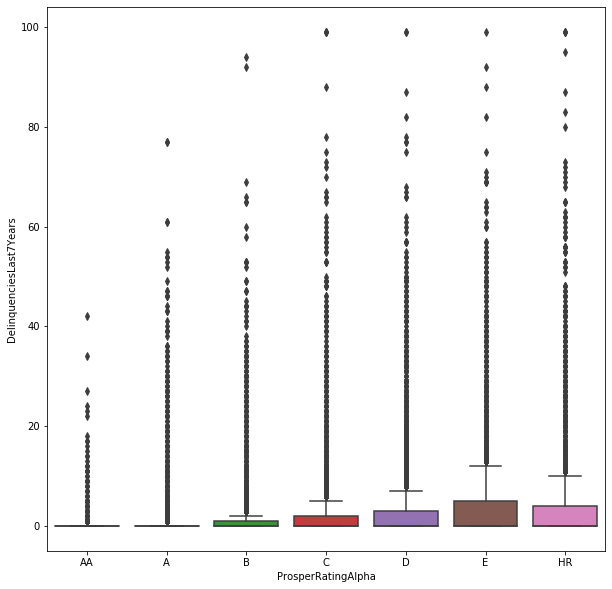

In [59]:
# ProsperRatingAlpha vs. DelinquenciesLast7Years
plt.figure(figsize=(10,10))
sns.boxplot(data=loan_subset, x='ProsperRatingAlpha', y='DelinquenciesLast7Years', order=ratings);

Lower ratings tend to have **higher** number of deliquencies in last 7 years.

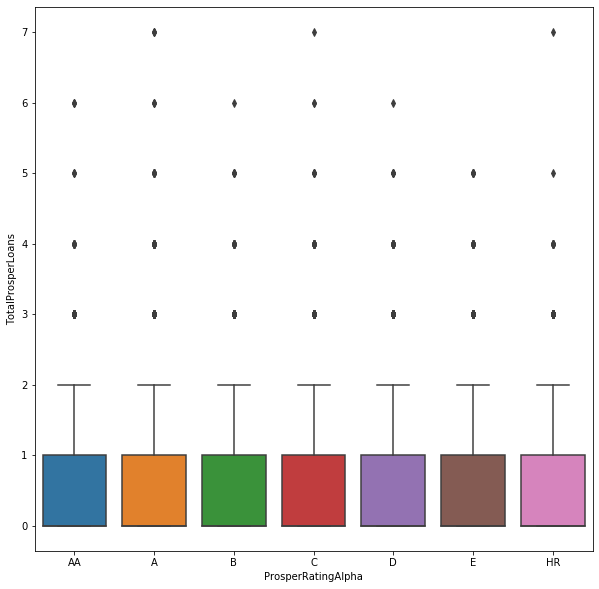

In [60]:
# ProsperRatingAlpha vs. TotalProsperLoans
plt.figure(figsize=(10,10))
sns.boxplot(data=loan_subset, x='ProsperRatingAlpha', y='TotalProsperLoans', order=ratings);

There is no obvious relationship between these two variabels.

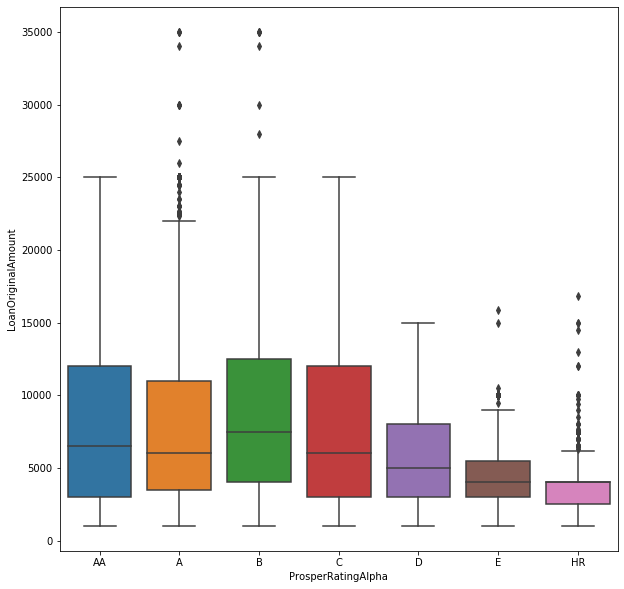

In [61]:
# ProsperRatingAlpha vs. LoanOriginalAmount
plt.figure(figsize=(10,10))
sns.boxplot(data=loan_subset, x='ProsperRatingAlpha', y='LoanOriginalAmount', order=ratings);

Lower ratings tend to have lower original loan amount.

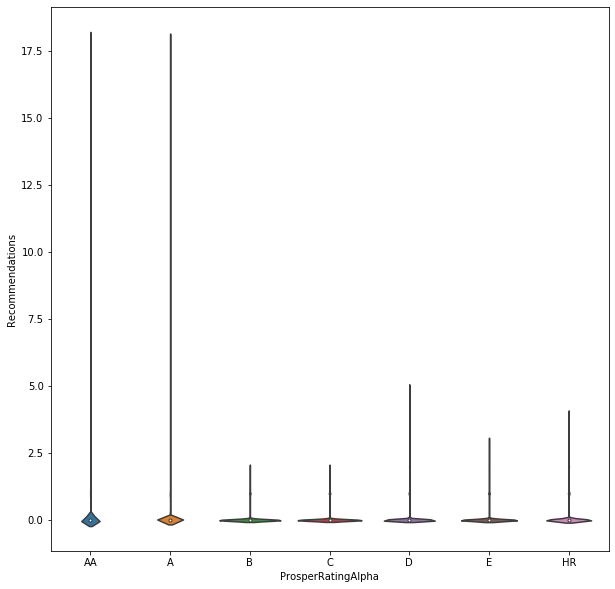

In [62]:
# ProsperRatingAlpha vs. Recommendations 
plt.figure(figsize=(10,10))
sns.violinplot(data=loan_subset, x='ProsperRatingAlpha', y='Recommendations', order=ratings);

There is no obvious relationship between these two variabels.

<a id="s2.3"></a>
### Step 2.3: Multivariate Exploring

As a final stage of the exploration, let's take a closer look at the relationship between Loan Status, Loan Original Amount, Borrower APR and Listing Category.

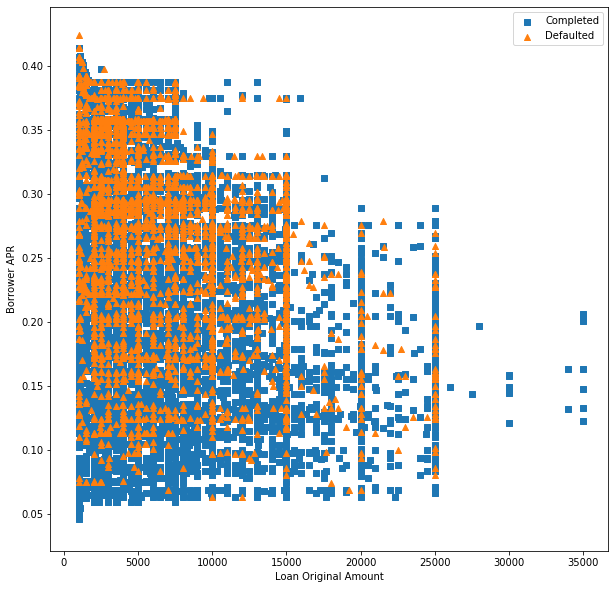

In [63]:
# BorrowerAPR vs. LoanOriginalAmount vs. LoanStatus
markers = [['Completed', 's'], ['Defaulted', '^']]
plt.figure(figsize=(10,10))
for cat, marker in markers:
    loan_cat = loan_subset[loan_subset['LoanStatus']==cat]
    plt.scatter(data=loan_cat, x='LoanOriginalAmount', y='BorrowerAPR', marker=marker)
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.legend(['Completed', 'Defaulted']);

For a given loan amount, borrower APR tends to be **lower in completed loans** than that in defaulted ones.

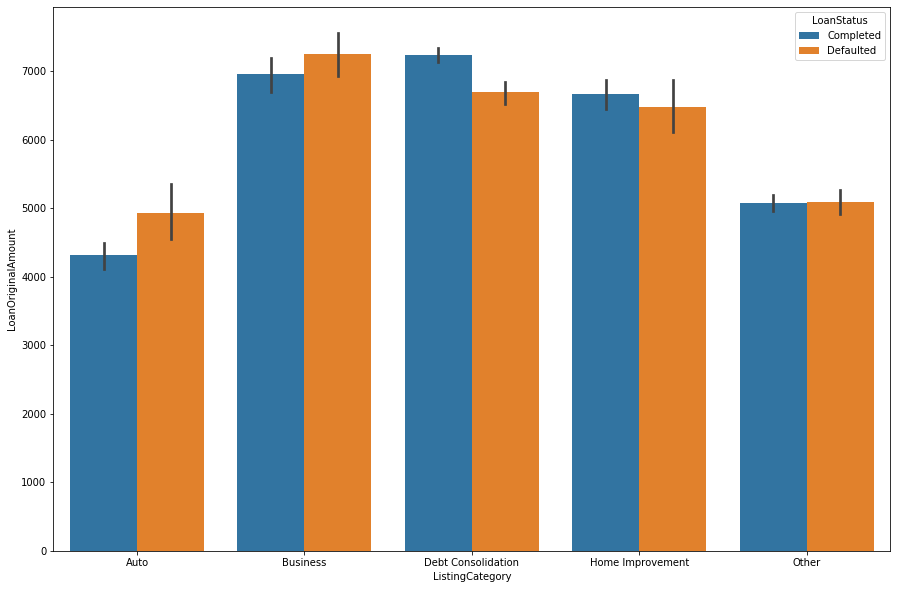

In [64]:
# LoanOriginalAmount vs. ListingCategory vs. LoanStatus
plt.figure(figsize=(15,10))
sns.barplot(data=loan_subset, x='ListingCategory', y='LoanOriginalAmount', hue='LoanStatus');

Defaulted loans in Auto or Business categories tend to have have larger original loan amount.